# Avance 1. Análisis exploratorio de datos
# Equipo 2


## David Moisés Alfandari Martínez - A01794577

## Fernando García Corona          - A01793717

## Jesús Elías Ruiz Montoya         - A01794485

In [107]:
# Montar Google Drive para cargar los datos.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# Importar librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [109]:
# Cargar el archivo CSV.
df = pd.read_csv('/content/drive/MyDrive/Proyecto Integrador/MultiFillRadiator.csv')

<ipython-input-109-b0f0e2ba6945>:2: DtypeWarning: Columns (5,6,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Proyecto Integrador/MultiFillRadiator.csv')


### Información general del DataFrame

In [110]:
# Exploración general del DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155213 entries, 0 to 155212
Data columns (total 35 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Machine                                155213 non-null  object 
 1   Timestamp                              155213 non-null  object 
 2   VIN                                    155213 non-null  object 
 3   ROT                                    155213 non-null  int64  
 4   Cycle Result                           155213 non-null  object 
 5   Failed on Field                        5 non-null       object 
 6   Machine ID                             155213 non-null  object 
 7   Cycle Time                             155213 non-null  float64
 8   Vacuum                                 155213 non-null  int64  
 9   Pressure                               155213 non-null  float64
 10  Volume                                 155213 non-null  

### Tipos de datos por columna

In [111]:
# Revisar tipos de datos.
df.dtypes

,0
Machine,object
Timestamp,object
VIN,object
ROT,int64
Cycle Result,object
Failed on Field,object
Machine ID,object
Cycle Time,float64
Vacuum,int64
Pressure,float64


### ¿Cuáles son las estadísticas resumidas del conjunto de datos?

In [112]:
# Revisar las estadísticas del conjunto de datos.
df.describe()

,ROT,Cycle Time,Vacuum,Pressure,Volume,Pressure Decay,Flowback Volume,EPS Style Selected,Overflow Bottle Volume,Overflow Bottle Fill Time,...,Air Test Achieved Pressure Decay,Air Test Status,Actual Style Selected,Vacuum Time,Pre-Flowback Stabilize Time,Vacuum Small Leak Decay Level,Vacuum Small Leak Decay Time,Vacuum 2 Level,Vacuum 2 Time,Unnamed: 34
count,155213.000000,155213.000000,155213.00000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,...,155213.000000,27.0,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000,155213.000000
mean,4999.671638,75.569631,7.50814,20.175779,9.140565,0.001394,4.136880,7.002194,0.001586,0.001550,...,0.110948,0.0,6.998512,33.068125,1.368574,4.574653,4.898784,6.763743,4.898446,1.000293
std,2859.881934,11.150291,3.25845,3.011894,1.963243,0.109931,0.940396,0.173951,0.123517,0.120214,...,0.138052,0.0,0.102058,4.781055,1.263764,2.562681,0.720203,2.095100,0.704581,0.023466
min,1.000000,0.000000,-4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,-0.800000,0.000000,-4.000000,0.000000,0.000000
25%,2554.000000,74.980000,6.00000,20.300000,8.260000,0.000000,3.800000,7.000000,0.000000,0.000000,...,0.100000,0.0,7.000000,33.500000,1.000000,3.100000,5.000000,6.000000,5.000000,1.000000
50%,4995.000000,76.500000,7.00000,20.500000,9.120000,0.000000,4.200000,7.000000,0.000000,0.000000,...,0.100000,0.0,7.000000,33.500000,1.000000,3.700000,5.000000,7.000000,5.000000,1.000000
75%,7450.000000,78.870000,9.00000,20.900000,9.770000,0.000000,4.800000,7.000000,0.000000,0.000000,...,0.100000,0.0,7.000000,33.500000,1.000000,5.800000,5.000000,8.000000,5.000000,1.000000
max,9999.000000,184.000000,209.00000,83.200000,81.250000,11.000000,11.000000,20.900000,11.320000,11.310000,...,14.200000,0.0,7.000000,34.500000,83.200000,81.300000,20.100000,206.000000,5.000000,3.500000


### Columnas Relevantes

In [113]:
numerical_cols = ['Vacuum', 'Pressure', 'Volume', 'Pressure Decay', 'Flowback Volume', 'EPS Style Selected', 'Overflow Bottle Fill Time', 'Evac/Fill Cycle Time' ]
categorical_cols = ['EPS Style Selected', 'Machine Cycle Status', 'Air Test Status', 'Air Test Result', 'Machine ID']
target = ['Cycle Result']

### ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?

In [114]:
df[numerical_cols].isnull().sum()

,0
Vacuum,0
Pressure,0
Volume,0
Pressure Decay,0
Flowback Volume,0
EPS Style Selected,0
Overflow Bottle Fill Time,0
Evac/Fill Cycle Time,0


In [115]:
# Convertir columnas relevantes a numéricas, forzando que los errores sean NaN.
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir nuestra variable objetivo a 1 cuando el estado es Pass y 0 cuando no
df['Cycle Result'] = df['Cycle Result'].map({'Pass': 1}).fillna(0).astype(int)

In [116]:
# Verificar si hay valores nulos después de la conversión.
print(df[numerical_cols].isnull().sum())

Vacuum                       0
Pressure                     0
Volume                       0
Pressure Decay               0
Flowback Volume              0
EPS Style Selected           0
Overflow Bottle Fill Time    0
Evac/Fill Cycle Time         0
dtype: int64


### ¿Hay valores atípicos en el conjunto de datos?

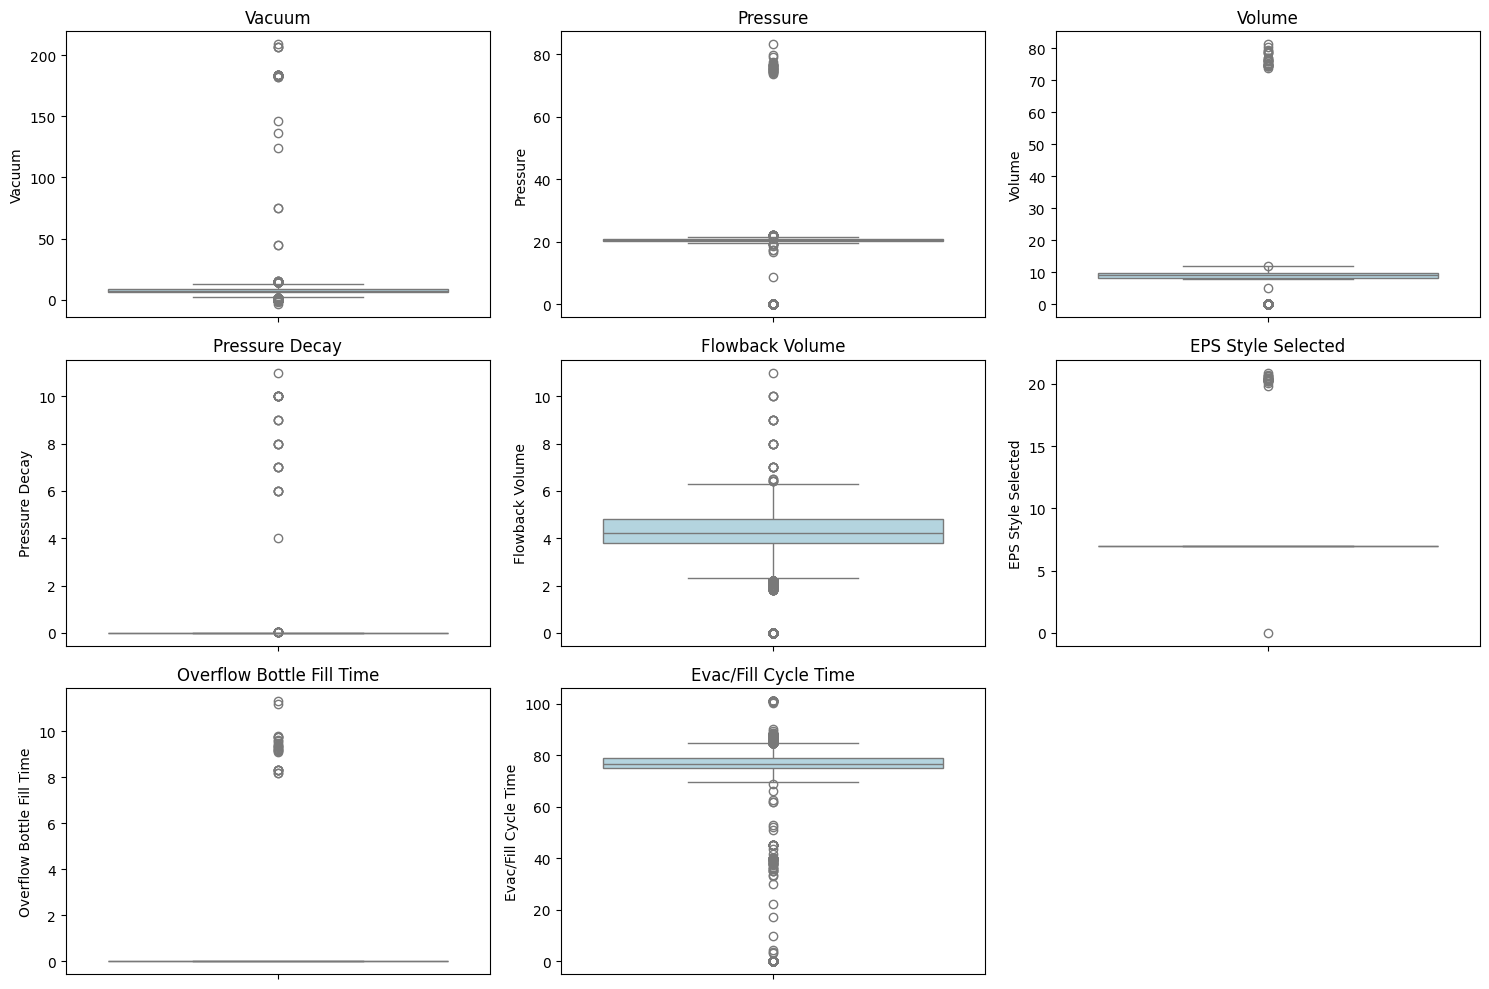

In [117]:
# Boxplots para detectar valores atípicos.

plt.figure(figsize=(15, 10))

rows = (len(numerical_cols) // 3) + 1  # Aseguramos que hay suficientes posiciones para los subplots.
for i, col in enumerate(numerical_cols, 1): # Iterar solo sobre las columnas válidas.
    plt.subplot(rows, 3, i) # Posicionar los subplots correctamente.
    sns.boxplot(data=df[col], color='lightblue')
    plt.title(f'{col}', fontsize=12)

plt.tight_layout()
plt.show()

### ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

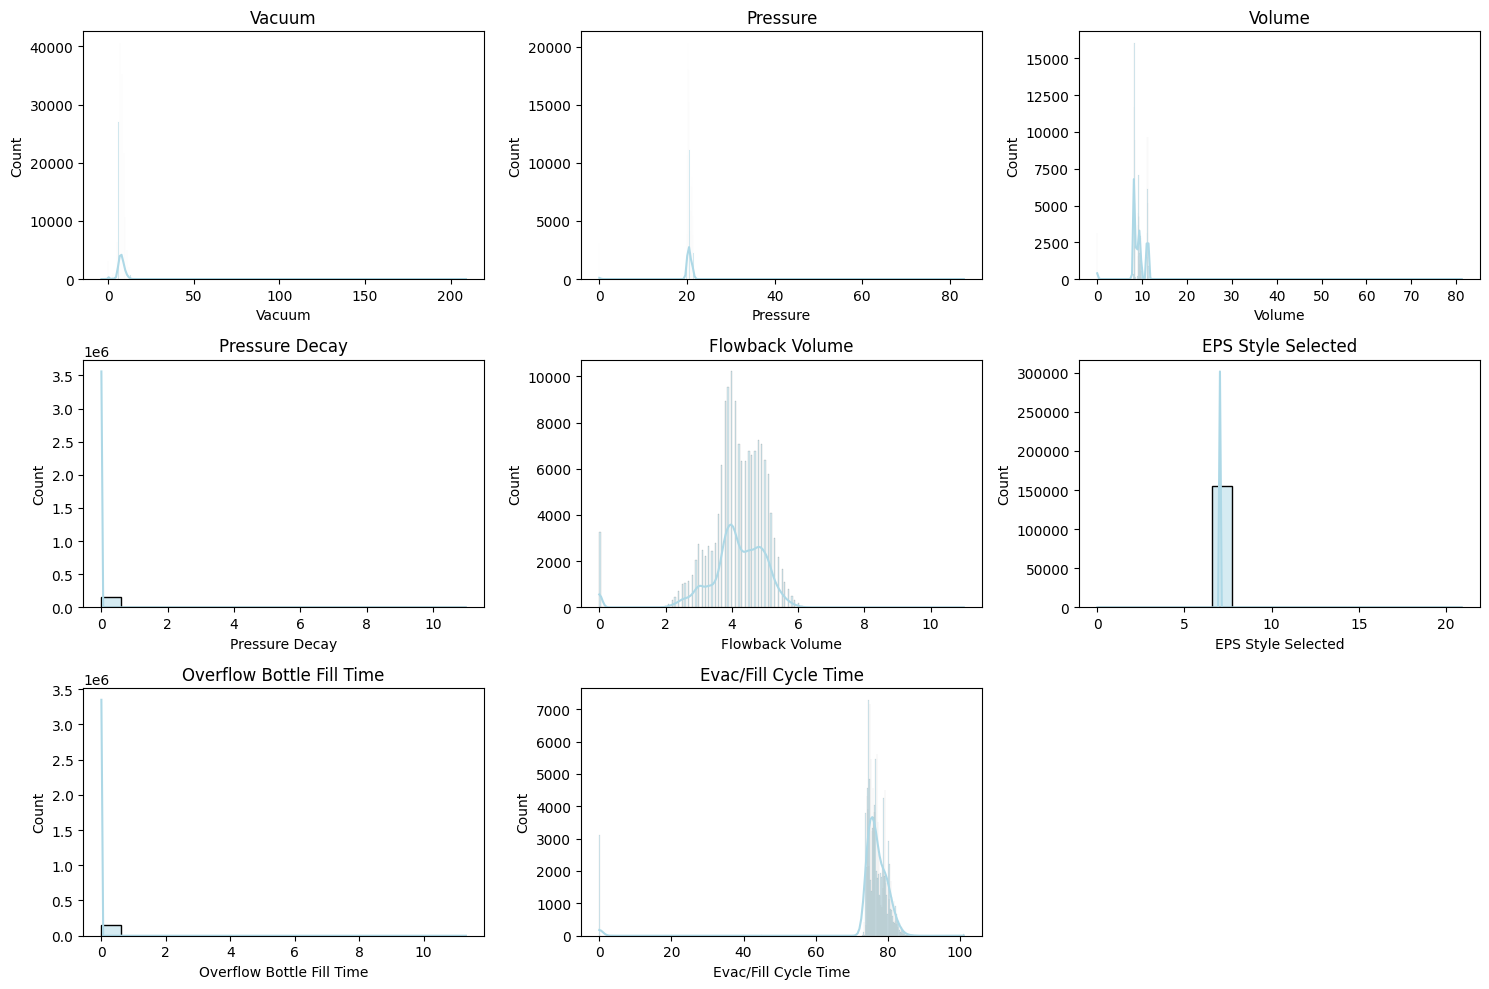

In [118]:
# Histogramas para revisar las distribuciones.
plt.figure(figsize=(15, 10))

rows = (len(numerical_cols) // 3) + 1
for i, col in enumerate(df[numerical_cols].select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, color='lightblue')
    plt.title(f'{col}', fontsize=12)

plt.tight_layout()
plt.show()

### ¿Hay correlación entre las variables dependientes e independientes?

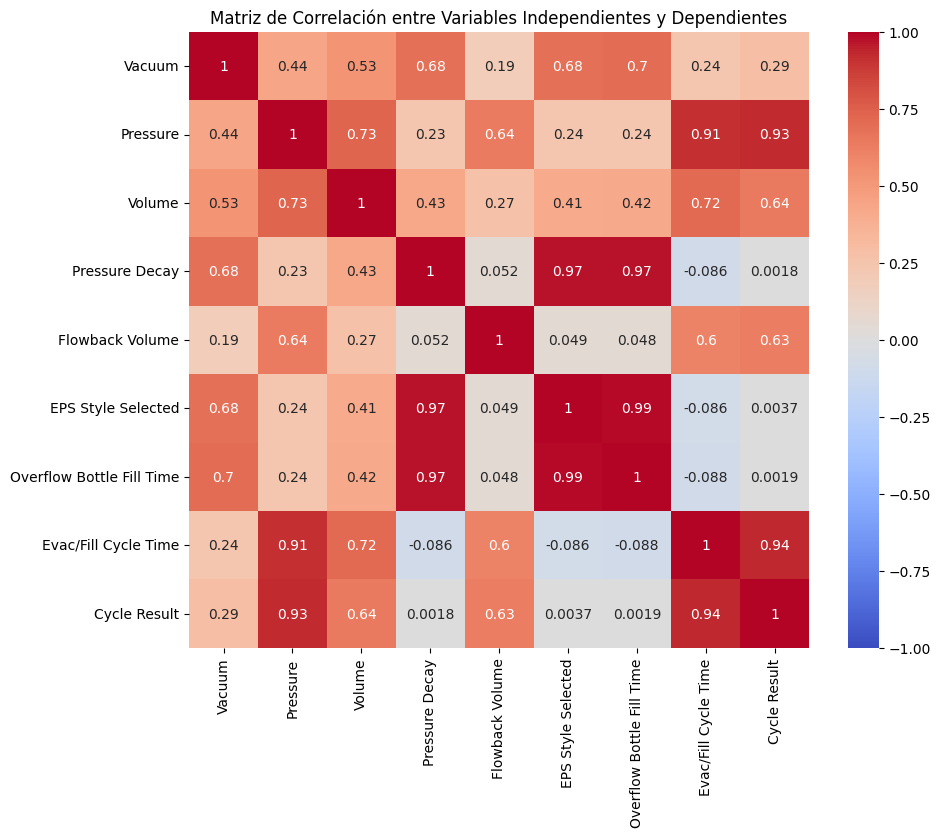

In [119]:
X = df[numerical_cols]

Y = df[target]

combined_df = pd.concat([X, Y], axis=1)

correlation_matrix = combined_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Variables Independientes y Dependientes')
plt.show()

### ¿Cómo se distribuyen los datos en función de diferentes categorías?

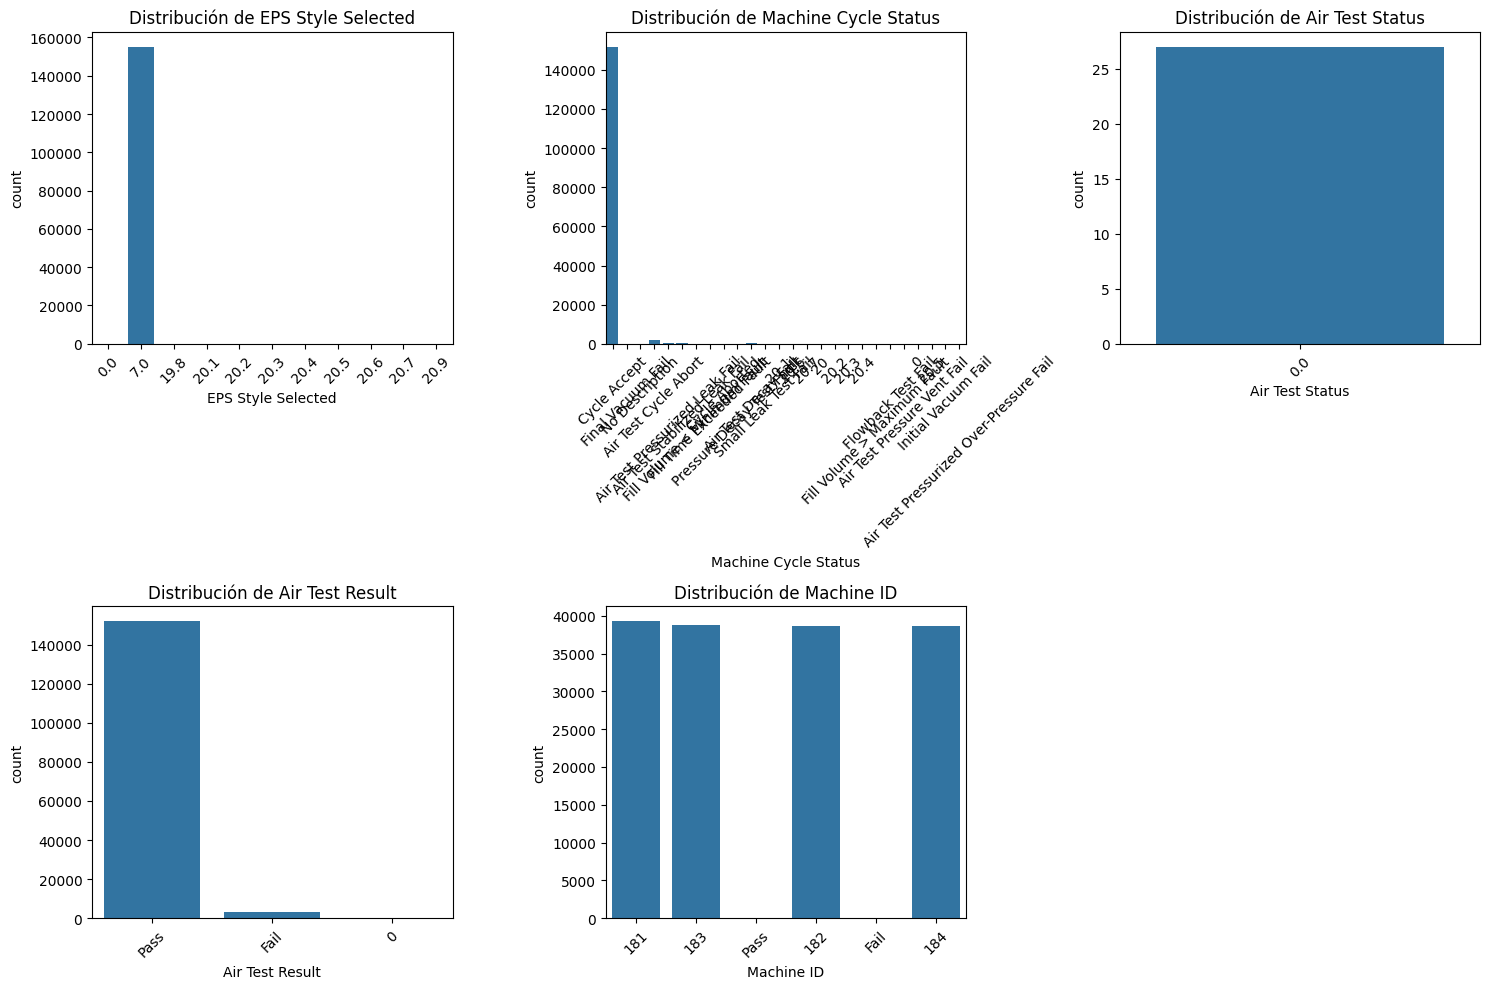

In [123]:
# Visualización de la distribución de datos en función de diferentes categorías.
plt.figure(figsize=(15, 10))
rows = (len(categorical_cols) // 3) + 1

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=df[col], data=df)
    plt.title(f'Distribución de {col}', fontsize=12)
    plt.xticks(rotation=45)  # Rotación de los nombres de las categorías.

plt.tight_layout()
plt.show()

### ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

Vacuum                       0
Pressure                     0
Volume                       0
Pressure Decay               0
Flowback Volume              0
EPS Style Selected           0
Overflow Bottle Fill Time    0
Evac/Fill Cycle Time         0
dtype: int64


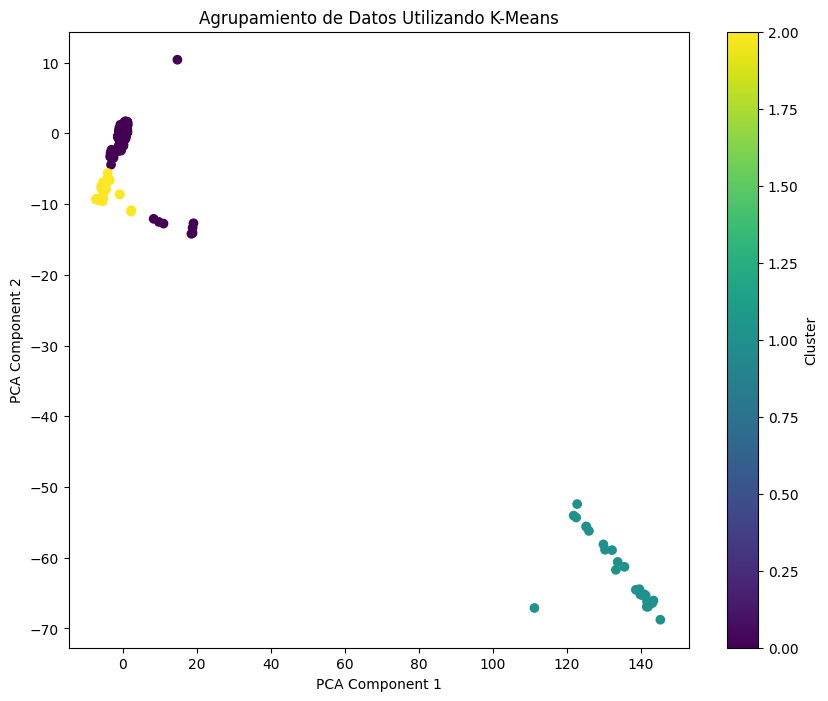

In [121]:
# Verificamos si hay valores nulos en las columnas seleccionadas.
print(df[numerical_cols].isnull().sum())

# Imputación o eliminación de valores nulos (aquí se eliminamos las filas con NaN).
df_clean = df[numerical_cols].dropna()

# Estandarización de los datos.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Realizamos los agrupamientos por medio de: K-means clustering.
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizamos los clusters utilizando PCA para reducir la dimensionalidad a 2D.
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_clean['Cluster'], cmap='viridis')
plt.title('Agrupamiento de Datos Utilizando K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

### ¿Se deberían normalizar las imágenes para visualizarlas mejor? No se trabaja con imagenes

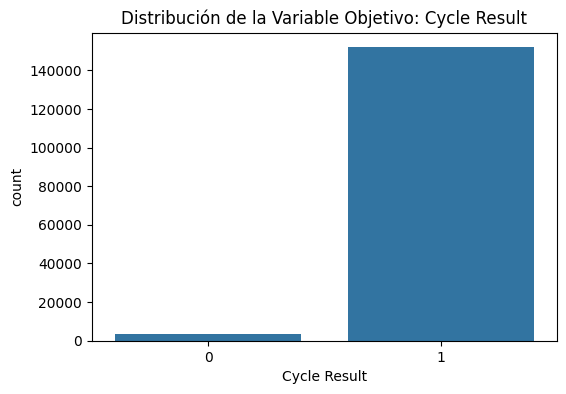

Cycle Result
1    0.978436
0    0.021564
Name: proportion, dtype: float64


In [122]:
# Comprobación de desequilibrio en la variable objetivo 'Cycle Result'.
plt.figure(figsize=(6, 4))
sns.countplot(x='Cycle Result', data=df)
plt.title('Distribución de la Variable Objetivo: Cycle Result')
plt.show()

# Visualización de la proporción de clases.
class_distribution = df['Cycle Result'].value_counts(normalize=True)
print(class_distribution)

# Conclusiones
## Calidad y estructura de los datos
Es importante verificar si existen valores nulos en las variables numéricas del conjunto de datos que puedan impactar el análisis de exploración inicial y que posteriormente, podría impedir el proceso de agrupamiento o 'clustering'. Con el objetivo de mantener la fluidez y la integridad del análisis incluso con bases de datos postriores, fue necesario imputar dichos valores nulos o eliminar las filas correspondientes.
Por otro lado, se realizó un análisis de las estadísticas descriptivas para obtener una visión general de las distribuciones y rangos de las variables. A partir de la observación de los gráficos identificamos la necesidad de transformaciones adicionales en un tratamiento posterior.

## Valores atípicos y distribuciones
Por medio de diagramas de caja o 'boxplots', identificamos la existencia de valores atípicos en algunas variables importantes como en el tiempo del ciclo de evacuación/llenado y el volumen de llenado. La existencia de estos valores a los extremos pueden estar teniendo injerencia en el proceso general y pueden estar influyendo en las incidencias de fallos observados. Consideramos importante compartir estas observaciones con el especialista para ponderar el potencial impacto de estas desviaciones en las distribuciones.

## Correlaciones
Por medio de la matriz de correlación entre variables independientes y dependientes observamos algunas relaciones de moderada preponderancia entre algunas variables como la presión y el tiempo del ciclo de llenado, a partir de las cuales podemos sugerir el uso de modelos supervizados para predecir las magnitudes adecuadas en variables de interés.

## Patrones de datos a partir del Clustering o agrupamiento
Se aplicó el algoritmo 'K-means' para la agrupación de muestras en función de la similitud entre sus características, y el análisis visual por medio de PCA indica que los datos pueden identificarse dentro de tres 'clusters' o grupos principales. Esto sugiere  diferentes grupos de máquinas o comportamientos durante los procesos de llenado. Los patrones pueden ser útiles para una posterior segmentación entre grupos de operación en las máquinas.

## Próximos pasos a considerar con la Dra. Grettel

¿Se sugiere utilizar otros algoritmos de agrupamiento o 'clustering' para buscar que la cantidad y distribución de los grupos sea optimizada?

¿Es conveniente aplicar en este momento validación cruzada?

¿Podemos proceder en este momento a utilizar otras técnicas de reducción de dimensionalidad o redes neuronales profundas para encontrar relaciones más complejas entre los datos?